# Optimization, Newton Methods, & Profit Maximization

### Import relevant packages

In [205]:
import sympy as sm
import numpy as np
import pandas as pd

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

from optimization import newton_method, gradient_descent, constrained_newton_method

import statsmodels.api as stats

## Part 1: Basic Optimization Theory

### Gradient Descent

In [2]:
## Gradient Descent Visualization

x  = sm.symbols('x')

function = 3*x**2 + 2*x - 24

symbols = [x]
x0 = {x:3}

GD_values = gradient_descent(function,symbols,x0,iterations=20)

Starting Values: [3]
Step 1: [1.]
Step 2: [0.2]
Step 3: [-0.12]
Step 4: [-0.248]
Step 5: [-0.2992]
Step 6: [-0.31968]
Step 7: [-0.327872]
Step 8: [-0.3311488]
Step 9: [-0.33245952]
Step 10: [-0.33298381]
Step 11: [-0.33319352]
Step 12: [-0.33327741]
Step 13: [-0.33331096]
Step 14: [-0.33332439]
Step 15: [-0.33332975]
Step 16: [-0.3333319]

Convergence Achieved (17 iterations): Solution = {x: -0.3333327606710272}


### Newton Method

In [3]:
## Optimization

x, y  = sm.symbols('x y')

function = 100*(y-x**2)**2 + (1-x)**2

symbols = [x,y]
x0 = {x:-1.2,y:1}

NM_values = newton_method(function,symbols,x0,iterations=20)

Starting Values: [-1.2  1. ]
Step 1: [-1.1752809   1.38067416]
Step 2: [ 0.76311487 -3.17503385]
Step 3: [0.76342968 0.58282478]
Step 4: [0.99999531 0.94402732]
Step 5: [0.9999957  0.99999139]
Step 6: [1. 1.]

Convergence Achieved (7 iterations): Solution = {x: 1.0, y: 1.0}


## Part 2: Constrained Optimization Theory

### Lagrangian 

In [4]:
## Optimization

x, y, L  = sm.symbols('x y L')

Lagrangian = 100*(y-x**2)**2 + (1-x)**2 - L*(x**2-y-2)

Gamma = [x,y,L]
Gamma0 = {x:-1.2,y:1,L:1}

L_values = newton_method(Lagrangian,Gamma,Gamma0)

Starting Values: [-1.2  1.   1. ]
Step 1: [ -1.175  -0.62  400.   ]
Step 2: [  0.75833333  -5.16270833 400.        ]
Step 3: [  0.75865618  -1.42444091 400.        ]
Step 4: [  0.99999497  -1.05825447 400.        ]
Step 5: [  0.99999537  -1.00000927 400.        ]
Step 6: [  1.  -1. 400.]

Convergence Achieved (7 iterations): Solution = {x: 1.0, y: -1.0, L: 400.0}


### Logarithmic Barrier Function

In [5]:
## Optimization

x, y, rho = sm.symbols('x y rho')

function = 100*(y-x**2)**2 + (1-x)**2 - rho*sm.log((-x)*(y-3))

# Function requires last symbol to be rho!
symbols = [x,y,rho]
x0 = {x:-15,y:15,rho:10}

barrier_values = constrained_newton_method(function,symbols,x0,mute=False)

Step 1 w/ {rho: 10}
Starting Values: [-15  15]
Convergence Achieved (17 iterations): Solution = {x: -3.739756319373101, y: 13.990326783551538}

Step 2 w/ {rho: 9.0}
Starting Values: [-3.73975632 13.99032678]
Convergence Achieved (5 iterations): Solution = {x: -3.5651000852143717, y: 12.714570834578089}

Step 3 w/ {rho: 8.1}
Starting Values: [-3.56510009 12.71457083]
Convergence Achieved (5 iterations): Solution = {x: -3.402264760327976, y: 11.58012570993156}

Step 4 w/ {rho: 7.29}
Starting Values: [-3.40226476 11.58012571]
Convergence Achieved (5 iterations): Solution = {x: -3.250794181169271, y: 10.572476293185266}

Step 5 w/ {rho: 6.561}
Starting Values: [-3.25079418 10.57247629]
Convergence Achieved (5 iterations): Solution = {x: -3.1102458335536602, y: 9.678541146019919}

Step 6 w/ {rho: 5.9049000000000005}
Starting Values: [-3.11024583  9.67854115]
Convergence Achieved (5 iterations): Solution = {x: -2.9801849149853936, y: 8.886517741371454}

Step 7 w/ {rho: 5.3144100000000005}
St

### Putting them together

In [6]:
## Optimization

x, y, L, rho = sm.symbols('x y L rho')

function = 100*(y-x**2)**2 + (1-x)**2 + L*(x**2-y-2) - rho*sm.log((-x)*(y-3))

# Function requires last symbol to be rho!
symbols = [x,y,L,rho]
x0 = {x:-15,y:15,L:0,rho:10}

combined_values = constrained_newton_method(function,symbols,x0,mute=False)

Step 1 w/ {rho: 10}
Starting Values: [-15  15   0]
Convergence Achieved (15 iterations): Solution = {x: -3.9631764104337135, y: 13.706767260218255, L: -400.93398873413037}

Step 2 w/ {rho: 9.0}
Starting Values: [  -3.96317641   13.70676726 -400.93398873]
Convergence Achieved (5 iterations): Solution = {x: -3.802167311247783, y: 12.456476262721091, L: -400.951728714794}

Step 3 w/ {rho: 8.1}
Starting Values: [  -3.80216731   12.45647626 -400.95172871]
Convergence Achieved (5 iterations): Solution = {x: -3.6534890867704632, y: 11.347982507150826, L: -400.97029431878434}

Step 4 w/ {rho: 7.29}
Starting Values: [  -3.65348909   11.34798251 -400.97029432]
Convergence Achieved (5 iterations): Solution = {x: -3.5166013015724937, y: 10.366484714221338, L: -400.9896172031588}

Step 5 w/ {rho: 6.561}
Starting Values: [  -3.5166013    10.36648471 -400.9896172 ]
Convergence Achieved (5 iterations): Solution = {x: -3.3909548710786486, y: 9.498574937692009, L: -401.0096059617542}

Step 6 w/ {rho: 5.

## Part 3: Econometric Profit Maximization

In [286]:
def quantity_ar2_process(T, 𝛼1, 𝛼2, u, df, params):

    A = np.identity(T)  # The T x T identity matrix

    for i in range(T):

        if i-1 >= 0:
            A[i, i-1] = -𝛼1

        if i-2 >= 0:
            A[i, i-2] = -𝛼2

    b = np.array(df) @ params

    return np.linalg.solve(A, b+u)

In [287]:
df = pd.DataFrame()


# Digital Advertising 
df['log_digital_advertising'] = np.log(np.random.normal(loc=50000,scale=15000,size=120).round())
df['log_digital_advertising_lag1'] = df['log_digital_advertising'].shift(1)
df['log_digital_advertising_lag2'] = df['log_digital_advertising'].shift(2)

# Television Advertising
df['log_television_advertising'] = np.log(np.random.normal(loc=50000,scale=15000,size=120).round())
df['log_television_advertising_lag1'] = df['log_television_advertising'].shift(1)
df['log_television_advertising_lag2'] = df['log_television_advertising'].shift(2)

# Price
df['price'] = np.random.normal(loc=180,scale=15,size=120).round()
df['price_lag1'] = df['price'].shift(1)
df['price_lag2'] = df['price'].shift(2)

# Competitor Price
df['comp_price'] = np.random.normal(loc=120,scale=15,size=120).round()
df['comp_price_lag1'] = df['comp_price'].shift(1)
df['comp_price_lag2'] = df['comp_price'].shift(2)

# Season 
from itertools import cycle
months = cycle(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
df['months'] = [next(months) for m in range(len(df))]

one_hot = pd.get_dummies(df['months'])
one_hot = one_hot[['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']]
df = df.join(one_hot).drop('months',axis=1)

# Constant
df['constant'] = 1

# Drop NaN
df = df.dropna()

df

,log_digital_advertising,log_digital_advertising_lag1,log_digital_advertising_lag2,log_television_advertising,log_television_advertising_lag1,log_television_advertising_lag2,price,price_lag1,price_lag2,comp_price,...,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,constant
2,10.946076,11.274605,11.077826,10.460987,11.012347,10.491746,168.0,172.0,194.0,125.0,...,0,0,0,0,0,0,0,0,0,1
3,10.645901,10.946076,11.274605,11.370636,10.460987,11.012347,145.0,168.0,172.0,134.0,...,1,0,0,0,0,0,0,0,0,1
4,9.876065,10.645901,10.946076,10.666534,11.370636,10.460987,177.0,145.0,168.0,124.0,...,0,1,0,0,0,0,0,0,0,1
5,10.744343,9.876065,10.645901,10.052898,10.666534,11.370636,186.0,177.0,145.0,150.0,...,0,0,1,0,0,0,0,0,0,1
6,10.864675,10.744343,9.876065,11.189506,10.052898,10.666534,149.0,186.0,177.0,114.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,11.216082,10.497284,10.908796,10.356631,10.377390,11.215368,191.0,172.0,163.0,98.0,...,0,0,0,0,1,0,0,0,0,1
116,10.815549,11.216082,10.497284,10.223286,10.356631,10.377390,199.0,191.0,172.0,114.0,...,0,0,0,0,0,1,0,0,0,1
117,11.259671,10.815549,11.216082,10.575794,10.223286,10.356631,162.0,199.0,191.0,117.0,...,0,0,0,0,0,0,1,0,0,1
118,10.758881,11.259671,10.815549,10.413943,10.575794,10.223286,153.0,162.0,199.0,126.0,...,0,0,0,0,0,0,0,1,0,1


In [288]:
params = np.array(
    [10_000,
    5_000,
    2_000,
    6_000,
    3_000,
    1_000,
    -1_000,
    -500,
    -100,
    500,
    300,
    100,
    25_000,
    15_000,
    15_000,
    10_000,
    10_000,
    10_000,
    15_000,
    15_000,
    25_000,
    35_000,
    35_000,
    40_000,
    50_000
    ])

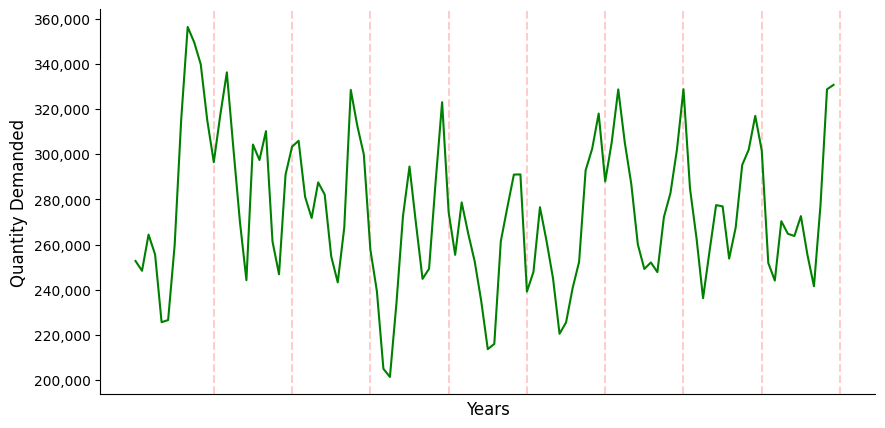

In [289]:
## Quantity Demand AR(2) component process

# parameters
T = 118
𝛼1 = 0.3
𝛼2 = 0.05
u = np.random.normal(0, 5000, size=T)

quantity_demanded_ar = quantity_ar2_process(T,𝛼1,𝛼2,u,df,params)

avg_demand = np.mean(quantity_demanded_ar)

fig, ax = plt.subplots(figsize=(10,5)) #, dpi=500)

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['bottom'].set_position(('data',avg_demand))

plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)      

for i in range(0,108,12):
    line = 108 - i
    ax.axvline(x=line, color='r', linestyle='--', alpha=0.2)

# ax.axhline(y=avg_demand, color='black', linewidth=0.2)

plt.plot(np.arange(108), quantity_demanded_ar[10:], color='g')
plt.xlabel('Years',size="large")
plt.ylabel('Quantity Demanded',size='large')

plt.show()

In [290]:
df[10:]

,log_digital_advertising,log_digital_advertising_lag1,log_digital_advertising_lag2,log_television_advertising,log_television_advertising_lag1,log_television_advertising_lag2,price,price_lag1,price_lag2,comp_price,...,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,constant
12,10.970626,10.421507,10.931731,10.985598,9.648853,10.872466,221.0,172.0,167.0,89.0,...,0,0,0,0,0,0,0,0,0,1
13,10.940526,10.970626,10.421507,10.649939,10.985598,9.648853,178.0,221.0,172.0,146.0,...,0,0,0,0,0,0,0,0,0,1
14,11.223949,10.940526,10.970626,10.744624,10.649939,10.985598,190.0,178.0,221.0,120.0,...,0,0,0,0,0,0,0,0,0,1
15,10.999296,11.223949,10.940526,10.351789,10.744624,10.649939,193.0,190.0,178.0,130.0,...,1,0,0,0,0,0,0,0,0,1
16,10.766061,10.999296,11.223949,10.457545,10.351789,10.744624,202.0,193.0,190.0,107.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,11.216082,10.497284,10.908796,10.356631,10.377390,11.215368,191.0,172.0,163.0,98.0,...,0,0,0,0,1,0,0,0,0,1
116,10.815549,11.216082,10.497284,10.223286,10.356631,10.377390,199.0,191.0,172.0,114.0,...,0,0,0,0,0,1,0,0,0,1
117,11.259671,10.815549,11.216082,10.575794,10.223286,10.356631,162.0,199.0,191.0,117.0,...,0,0,0,0,0,0,1,0,0,1
118,10.758881,11.259671,10.815549,10.413943,10.575794,10.223286,153.0,162.0,199.0,126.0,...,0,0,0,0,0,0,0,1,0,1


In [291]:
df['quantity_demanded'] = quantity_demanded_ar
df['quantity_demanded_lag1'] = df['quantity_demanded'].shift(1)
df['quantity_demanded_lag2'] = df['quantity_demanded'].shift(2)

In [292]:
## Fit model

df = df[10:]
y = df['quantity_demanded']
X = df.drop(['quantity_demanded','July'],axis=1)

mod = stats.OLS(y,X)
results = mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      quantity_demanded   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     225.0
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           3.10e-65
Time:                        16:32:51   Log-Likelihood:                -1046.5
No. Observations:                 108   AIC:                             2145.
Df Residuals:                      82   BIC:                             2215.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
log_digita

In [293]:
# Build Symbolic Functions with all variables in function (ESTIMATE HERE WITH REGRESSION)
delta, tau, L, rho  = sm.symbols('delta tau L rho')


price = 180
comp_price = 120
Jan = 1

## Obtain Lagged Values
log_digital_advertising_lag1 = df['log_digital_advertising_lag1'].iloc[-1]
log_digital_advertising_lag2 = df['log_digital_advertising_lag2'].iloc[-1]
log_television_advertising_lag1 = df['log_television_advertising_lag1'].iloc[-1]
log_television_advertising_lag2 = df['log_television_advertising_lag2'].iloc[-1]
price_lag1 = df['price_lag1'].iloc[-1]
price_lag2 = df['price_lag2'].iloc[-1]
comp_price_lag1 = df['comp_price_lag1'].iloc[-1]
comp_price_lag2 = df['comp_price_lag2'].iloc[-1]
quantity_demanded_lag1 = df['quantity_demanded_lag1'].iloc[-1]
quantity_demanded_lag2 = df['quantity_demanded_lag2'].iloc[-1]


vars = [sm.log(delta),
        log_digital_advertising_lag1,
        log_digital_advertising_lag2,
        sm.log(tau),
        log_television_advertising_lag1,
        log_television_advertising_lag2,
        price,
        price_lag1,
        price_lag2,
        comp_price,
        comp_price_lag1,
        comp_price_lag2,
        Jan,0,0,0,0,0,0,0,0,0,0, # All Months less July 
        1, # Constant
        quantity_demanded_lag1,
        quantity_demanded_lag2
        ]

params = np.array(results.params)

# Quantity
quantity_demanded = np.array([vars]) @ params
quantity_demanded = quantity_demanded[0]

In [294]:
## Profit Function 

prod_cost = 140 - 0.0001*quantity_demanded
Revenue = price * quantity_demanded
Cost = quantity_demanded * prod_cost + tau + delta
profit = Revenue - Cost

In [297]:
## Optimization Problem

objective = -profit + L*(tau + delta - 100_000) - rho*sm.log((tau-20_000)*(delta-10_000))

symbols = [delta, tau, L, rho]
x0 = {delta:20_000, tau:80_000, L:0, rho:10}

results = constrained_newton_method(objective,symbols,x0,iterations=1000,mute=False)

Step 1 w/ {rho: 10}
Starting Values: [20000 80000     0]
Convergence Achieved (6 iterations): Solution = {delta: 58870.17886505666, tau: 41129.82113494334, L: 11.559459277853032}

Step 2 w/ {rho: 9.0}
Starting Values: [5.88701789e+04 4.11298211e+04 1.15594593e+01]
Convergence Achieved (2 iterations): Solution = {delta: 58870.230655053994, tau: 41129.769344946006, L: 11.55942776651231}

Step 3 w/ {rho: 8.1}
Starting Values: [5.88702307e+04 4.11297693e+04 1.15594278e+01]
Convergence Achieved (2 iterations): Solution = {delta: 58870.27726647189, tau: 41129.72273352811, L: 11.559399406269423}

Step 4 w/ {rho: 7.29}
Starting Values: [5.88702773e+04 4.11297227e+04 1.15593994e+01]
Convergence Achieved (2 iterations): Solution = {delta: 58870.31921708842, tau: 41129.68078291158, L: 11.559373882021466}

Step 5 w/ {rho: 6.561}
Starting Values: [5.88703192e+04 4.11296808e+04 1.15593739e+01]
Convergence Achieved (2 iterations): Solution = {delta: 58870.356972919064, tau: 41129.643027080936, L: 11.

In [273]:
print(profit)

-delta - tau - (-0.968313410101684*log(delta) - 0.466405178120087*log(tau) + 129.119659400231)*(9683.13410101684*log(delta) + 4664.05178120087*log(tau) + 108803.405997689) + 1742964.13818303*log(delta) + 839529.320616157*log(tau) + 19584613.079584


In [275]:
digital_ad = 61969.85331536775
television_ad = 38030.14668463225

quantity = quantity_demanded.evalf(subs={delta:digital_ad,tau:television_ad})
revenue = Revenue.evalf(subs={delta:digital_ad,tau:television_ad})
cost = Cost.evalf(subs={delta:digital_ad,tau:television_ad})
profit = revenue - cost

print(f"Quantity: {int(quantity):,}")
print(f"Total Revenue: ${round(revenue,2):,}")
print(f"Total Cost: ${round(cost,2):,}")
print(f"Profit: ${round(profit,2):,}")

Quantity: 264,838
Total Revenue: $47,670,971.43
Total Cost: $30,163,466.92
Profit: $17,507,504.51


C:\Users\jakep\AppData\Local\Temp\ipykernel_7668\1954874504.py:4: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
C:\Users\jakep\AppData\Local\Temp\ipykernel_7668\1954874504.py:11: RuntimeWarning: invalid value encountered in add
  profit_function = -delta - tau - (-0.968313410101684*log(delta) - 0.466405178120087*log(tau) + 129.119659400231)*(9683.13410101684*log(delta) + 4664.05178120087*log(tau) + 108803.405997689) + 1742964.13818303*log(delta) + 839529.320616157*log(tau) + 19584613.079584


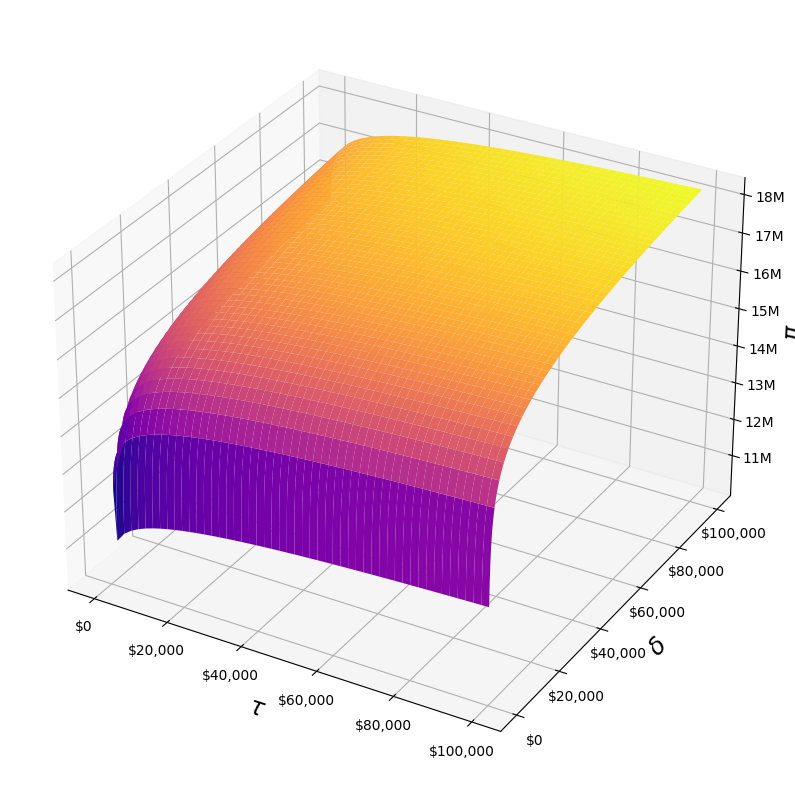

MovieWriter imagemagick unavailable; using Pillow instead.


In [301]:
## Plot

def log(x):
    return np.log(x)

# Defining surface and axes
tau = np.outer(np.linspace(0, 100000, 1000), np.ones(1000))
delta = np.outer(np.linspace(0, 100000, 1000), np.ones(1000)).T


profit_function = -delta - tau - (-0.968313410101684*log(delta) - 0.466405178120087*log(tau) + 129.119659400231)*(9683.13410101684*log(delta) + 4664.05178120087*log(tau) + 108803.405997689) + 1742964.13818303*log(delta) + 839529.320616157*log(tau) + 19584613.079584

fig = plt.figure(figsize=(10,10))
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
# ax.set_xticks([-10,-5,0,5,10])
# ax.set_yticks([-10,-5,0,5,10])
ax.set_xlabel(r'$\tau $', fontsize='xx-large')
ax.set_ylabel(r'$\delta $', fontsize='xx-large')
ax.set_zlabel(r'$\pi $', fontsize='xx-large')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.xaxis.set_major_formatter(tick)

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

ax.zaxis.set_major_formatter(formatter)

# syntax for plotting
ax.plot_surface(tau, delta, profit_function, cmap ='plasma')

plt.show()

# Rotating Visualization
def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

rot_animation.save('Images/profit.gif', dpi=100, writer='imagemagick')

## Visuals Pt. 1

### Cover Photo

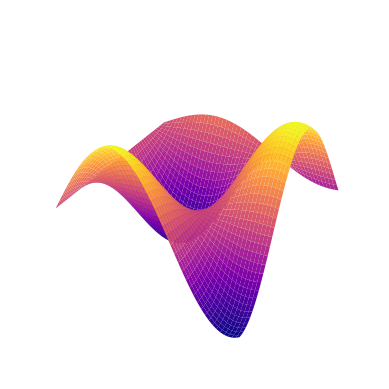

In [150]:
# Defining surface and axes
x = np.outer(np.linspace(0, 5, 50), np.ones(50))
y = x.copy().T
z = np.sin(x)*np.cos(y)
 
# dpi=600,figsize=(10,10)
fig = plt.figure()
# fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma')

plt.axis('off')
ax.grid(False)

plt.show()

In [ ]:
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/cover_rotation.gif', dpi=80, writer='imagemagick')

### Parabola Visual

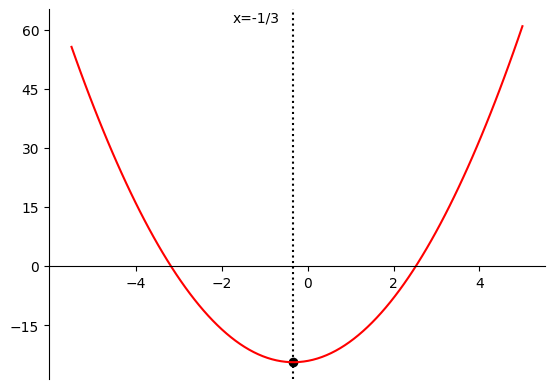

In [148]:
# Defining surface and axes
x = np.linspace(-5.5, 5, 100)
y = 3*x**2 + 2*x - 24

# setting the axes at the centre
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('right')
ax.set_yticks([60,45,30,15,0,-15])
ax.set_xticks([-4,-2,0,2,4])
ax.text(x=-1.75,y=62,s="x=-1/3")
ax.axvline(x=-1/3,linestyle=':',color='black')

# plot the function
plt.scatter(-1/3,  3*(-1/3)**2+2*(-1/3)-24, c='black')
plt.plot(x,y,'r')

# show the plot
plt.show()

### Gradient Descent Animation

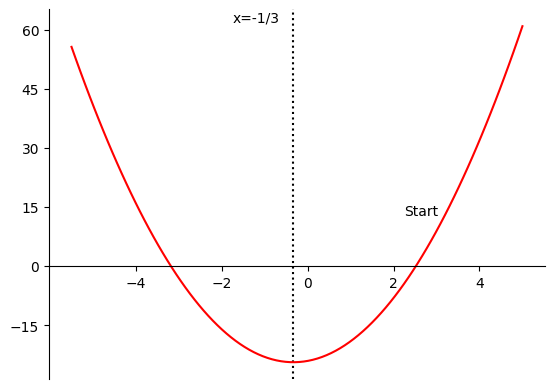

In [146]:
# Defining surface and axes
x = np.linspace(-5.5, 5, 100)
y = 3*x**2 + 2*x - 24

# setting the axes at the centre 
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('right')
ax.set_yticks([60,45,30,15,0,-15])
ax.set_xticks([-4,-2,0,2,4])
ax.text(x=-1.75,y=62,s="x=-1/3")
ax.text(x=2.25,y=13,s="Start")
ax.axvline(x=-1/3,linestyle=':',color='black')

# plot the function
plt.plot(x,y,'r')

plt.show()

## Gradient Descent Animation

# x2=[]
# y2=[]

# def animate(iterations):
#     x2.append(float([v for v in GD_values[iterations].values()][0]))
#     y2.append(float(function.evalf(subs=GD_values[iterations])))
#     ax.scatter(x2, y2, c='black')

# rot_animation = animation.FuncAnimation(fig, animate, frames=len(GD_values),interval=500)

# rot_animation.save('Images/gradient_descent.gif', dpi=600)

### Rosenbrock's Parabolic Valley

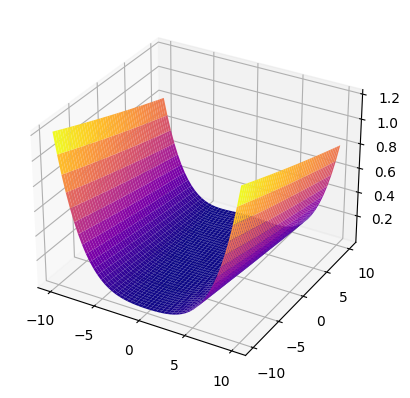

In [144]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2
 
# dpi=600,figsize=(5,5)
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma')

plt.show()

# ## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/rotation.gif', dpi=100, writer='imagemagick')

### Newton Method Visualization

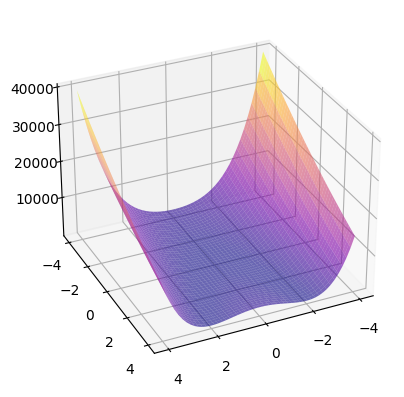

In [143]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-4, 4, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2
 
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
# ax.set_xticks([-10,-5,0,5,10])
# ax.set_yticks([-10,-5,0,5,10])

# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma',alpha=0.6)
ax.view_init(elev=30, azim=65)

plt.show()


# ## Newton Method Animation

# x2=[]
# y2=[]
# z2=[]

# def animate(iterations):

#     # Append & plot x and y values from optimization
#     x2.append(float([v for v in NM_values[iterations].values()][0]))
#     y2.append(float([v for v in NM_values[iterations].values()][1]))
#     z2.append(float(function.evalf(subs=NM_values[iterations])))
#     ax.scatter(x2, y2, z2, c='black')
#     ax.plot(x2, y2, z2, c='black')

# rot_animation = animation.FuncAnimation(fig, animate, frames=len(NM_values),interval=1000)

# rot_animation.save('Images/newton_method2.gif', dpi=100)

## Visuals Pt. 2

### Equality Constrained Rosenbrock's Parabolic Valley

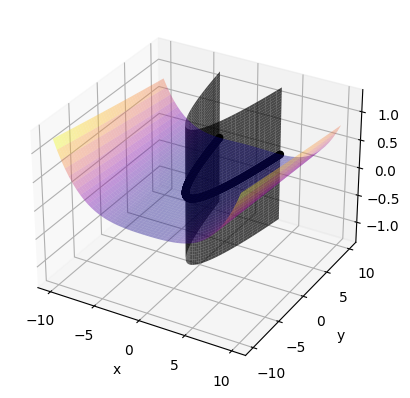

In [75]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2

# Constraint
xs = np.linspace(-np.sqrt(12), np.sqrt(12), 500)
zs = np.linspace(-1.2e6, 1.2e6, 500)
X, Z = np.meshgrid(xs, zs)
Y = X**2 - 2

# Constraint Intersection
X2 = np.linspace(-np.sqrt(12), np.sqrt(12), 500)
Y2 = X2**2 - 2
Z2 = 100*(Y2-X2**2)**2 + (1-X2)**2

# 
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_surface(X, Y, Z,color='black',alpha=0.7,zorder=3)
ax.plot_surface(x, y, z, cmap='plasma',alpha=0.4,zorder=2)
ax.scatter(X2, Y2, Z2,color='black',alpha=1,zorder=3)

plt.show()

## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/equality_constrained_rotation.gif', dpi=100, writer='imagemagick')

### Inequality Constrained Rosenbrock's Parabolic Valley

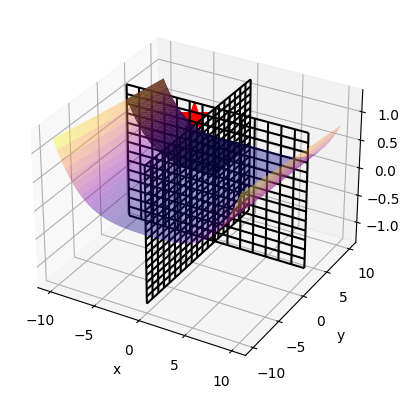

MovieWriter imagemagick unavailable; using Pillow instead.


In [74]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2

# Constraints 

# y >= 3
xc1 = np.linspace(-10, 10, 15)
zc1 = np.linspace(-1.2e6, 1.2e6, 15)
XC1, ZC1 = np.meshgrid(xc1, zc1)
YC1 = 3

# x <= 0
yc2 = np.linspace(-10, 10, 20)
zc2 = np.linspace(-1.2e6, 1.2e6, 20)
YC2, ZC2 = np.meshgrid(yc2, zc2)
XC2 = 0


# dpi=600,figsize=(5,5)
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_wireframe(XC1, YC1, ZC1,color='black',alpha=1,zorder=3)
ax.plot_wireframe(XC2, YC2, ZC2,color='black',alpha=1,zorder=3)
ax.plot_surface(x, y, z, cmap='plasma',alpha=0.4,zorder=2)

feasible_region_x = [-5]
feasible_region_y = [7.5]
feasible_region_z = [0.5e6]

ax.scatter(feasible_region_x, feasible_region_y, feasible_region_z, c='red',marker='*',s=500,zorder=4)

plt.show()

## Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/inequality_constrained_rotation.gif', dpi=100, writer='imagemagick')

### Logarithmic Barrier Function Examples

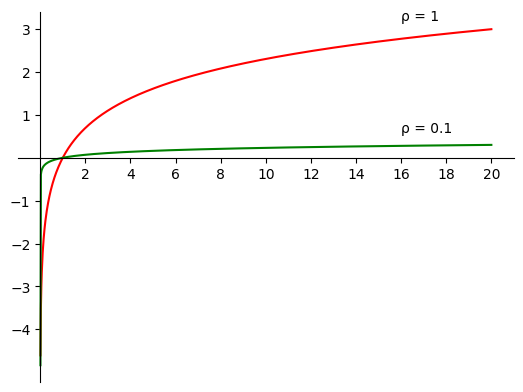

In [4]:
# Defining surface and axes
x = np.linspace(0.01, 20, 1000)
y = np.log(x)
x2 = np.linspace(0.000000000000000000001, 20, 1000)
y2 = 0.1*np.log(x2)

# setting the axes at the centre
# dpi=600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_yticks([-4,-3,-2,-1,1,2,3])
ax.set_xticks([2,4,6,8,10,12,14,16,18,20])

ax.text(x=16,y=3.2,s="ρ = 1")
ax.text(x=16,y=0.6,s="ρ = 0.1")

# plot the function
plt.plot(x,y,'r')
plt.plot(x,y2,'g')

# show the plot
plt.show()